In [126]:
# Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [54]:
def get_soup(website):
    r = requests.get(website)
    soup = BeautifulSoup(r.content)
    return(soup)
website = "https://spotifycharts.com/regional/us/weekly/2020-07-03--2020-07-10"
soup = get_soup(website)
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Spotify Charts</title>
<meta content="Spotify Charts" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.spotifycharts.com/" property="og:url"/>
<meta content="http://d2c87l0yth4zbw-2.global.ssl.fastly.net/i/_global/open-graph-default.png" property="og:image"/>
<meta content="Spotify is all the music you’ll ever need." property="og:description"/>
<meta content="Spotify is all the music you’ll ever need." name="description"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/images/touch-icon-144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="/images/touch-icon-114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/>
<link href="/images/touch-icon-72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
<link href="/images/touch-icon-57.png" rel="apple-touch

In [58]:
def create_data():
    soup = get_soup("https://spotifycharts.com/regional/global/weekly/latest")
    data_dictionary = {}
    for val in soup.find_all("li", {"class": [""]}):
        data_dictionary[val.get_text()] = val['data-value']
    return data_dictionary
data_dictionary = create_data()
print(data_dictionary)

{'United States': 'us', 'United Kingdom': 'gb', 'Andorra': 'ad', 'Argentina': 'ar', 'Austria': 'at', 'Australia': 'au', 'Belgium': 'be', 'Bulgaria': 'bg', 'Bolivia': 'bo', 'Brazil': 'br', 'Canada': 'ca', 'Switzerland': 'ch', 'Chile': 'cl', 'Colombia': 'co', 'Costa Rica': 'cr', 'Cyprus': 'cy', 'Czech Republic': 'cz', 'Germany': 'de', 'Denmark': 'dk', 'Dominican Republic': 'do', 'Ecuador': 'ec', 'Estonia': 'ee', 'Spain': 'es', 'Finland': 'fi', 'France': 'fr', 'Greece': 'gr', 'Guatemala': 'gt', 'Hong Kong': 'hk', 'Honduras': 'hn', 'Hungary': 'hu', 'Indonesia': 'id', 'Ireland': 'ie', 'Israel': 'il', 'India': 'in', 'Iceland': 'is', 'Italy': 'it', 'Japan': 'jp', 'Lithuania': 'lt', 'Luxembourg': 'lu', 'Latvia': 'lv', 'Mexico': 'mx', 'Malaysia': 'my', 'Nicaragua': 'ni', 'Netherlands': 'nl', 'Norway': 'no', 'New Zealand': 'nz', 'Panama': 'pa', 'Peru': 'pe', 'Philippines': 'ph', 'Poland': 'pl', 'Portugal': 'pt', 'Paraguay': 'py', 'Romania': 'ro', 'Sweden': 'se', 'Singapore': 'sg', 'Slovakia': 's

In [3]:
def get_stream_count(soup):
    stream_count = []
    for stream in soup.find_all("td", {"class": ["chart-table-streams"]}):
        stream_count.append(int(stream.get_text().replace(',','')))
    return np.mean(stream_count)
get_stream_count(soup)

2563259.07

In [49]:
def get_countries():
    countries = {}
    for key in data_dictionary:
        if len(data_dictionary[key]) == 2:
            countries[key] = data_dictionary[key]
    return(countries)
get_countries()

{'United Kingdom': 'gb',
 'Andorra': 'ad',
 'Argentina': 'ar',
 'Austria': 'at',
 'Australia': 'au',
 'Belgium': 'be',
 'Bulgaria': 'bg',
 'Bolivia': 'bo',
 'Brazil': 'br',
 'Canada': 'ca',
 'Switzerland': 'ch',
 'Chile': 'cl',
 'Colombia': 'co',
 'Costa Rica': 'cr',
 'Cyprus': 'cy',
 'Czech Republic': 'cz',
 'Germany': 'de',
 'Denmark': 'dk',
 'Dominican Republic': 'do',
 'Ecuador': 'ec',
 'Estonia': 'ee',
 'Spain': 'es',
 'Finland': 'fi',
 'France': 'fr',
 'Greece': 'gr',
 'Guatemala': 'gt',
 'Hong Kong': 'hk',
 'Honduras': 'hn',
 'Hungary': 'hu',
 'Indonesia': 'id',
 'Ireland': 'ie',
 'Israel': 'il',
 'India': 'in',
 'Iceland': 'is',
 'Italy': 'it',
 'Japan': 'jp',
 'Lithuania': 'lt',
 'Luxembourg': 'lu',
 'Latvia': 'lv',
 'Mexico': 'mx',
 'Malaysia': 'my',
 'Nicaragua': 'ni',
 'Netherlands': 'nl',
 'Norway': 'no',
 'New Zealand': 'nz',
 'Panama': 'pa',
 'Peru': 'pe',
 'Philippines': 'ph',
 'Poland': 'pl',
 'Portugal': 'pt',
 'Paraguay': 'py',
 'Romania': 'ro',
 'Sweden': 'se',
 'Si

In [51]:
'''def get_weeks(n):
    weeks = []
    d = dt.date(2019, 12, 27)
    for _ in range(n):
        weeks.append(str(d) + "--" + str(d + dt.timedelta(days=7)))
        d = d + dt.timedelta(days=7)
    return(weeks)'''

def get_weeks():
    weeks = {}
    for key in data_dictionary:
        if len(data_dictionary[key]) == 22:
            weeks[key] = data_dictionary[key]
    return(weeks)
get_weeks()

{'07/02/2020': '2020-06-26--2020-07-03',
 '06/25/2020': '2020-06-19--2020-06-26',
 '06/18/2020': '2020-06-12--2020-06-19',
 '06/11/2020': '2020-06-05--2020-06-12',
 '06/04/2020': '2020-05-29--2020-06-05',
 '05/28/2020': '2020-05-22--2020-05-29',
 '05/21/2020': '2020-05-15--2020-05-22',
 '05/14/2020': '2020-05-08--2020-05-15',
 '05/07/2020': '2020-05-01--2020-05-08',
 '04/30/2020': '2020-04-24--2020-05-01',
 '04/23/2020': '2020-04-17--2020-04-24',
 '04/16/2020': '2020-04-10--2020-04-17',
 '04/09/2020': '2020-04-03--2020-04-10',
 '04/02/2020': '2020-03-27--2020-04-03',
 '03/26/2020': '2020-03-20--2020-03-27',
 '03/19/2020': '2020-03-13--2020-03-20',
 '03/12/2020': '2020-03-06--2020-03-13',
 '03/05/2020': '2020-02-28--2020-03-06',
 '02/27/2020': '2020-02-21--2020-02-28',
 '02/20/2020': '2020-02-14--2020-02-21',
 '02/13/2020': '2020-02-07--2020-02-14',
 '02/06/2020': '2020-01-31--2020-02-07',
 '01/30/2020': '2020-01-24--2020-01-31',
 '01/23/2020': '2020-01-17--2020-01-24',
 '01/16/2020': '

In [59]:
# countries = ['us','gb']
countires = ['us']
output = pd.DataFrame(columns=['Country', 'Week', 'Count'])
for country in countries:
    weeks = get_weeks()
    for week in weeks:
        website = "https://spotifycharts.com/regional/" + country + "/weekly/" + weeks[week]
        soup = get_soup(website)
        count = get_stream_count(soup)
        output = output.append({'Country': country, 'Week': week, 'Count': count}, ignore_index=True)
        time.sleep(1)
output.head()

,Country,Week,Count
0,us,07/02/2020,2459531.530
1,us,06/25/2020,2420989.615
2,us,06/18/2020,2542620.100
3,us,06/11/2020,2435130.940
4,us,06/04/2020,2543330.320


In [16]:
# Sourced from https://ourworldindata.org/coronavirus-source-data
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [79]:
countries_ovid = ['USA']
output2 = pd.DataFrame(columns=['Country', 'Week', 'Cases'])
for country in countries_ovid:
    country_df = df[df['iso_code'] == country]
    weeks = get_weeks()
    for week in weeks:
        start_week = weeks[week][:10]
        end_week = weeks[week][-10:]
        cases = country_df[(country_df['date'] >= start_week) & (country_df['date'] < end_week)]['new_cases'].sum()
        output2 = output2.append({'Country': country, 'Week': week[-10:], 'Cases': cases}, ignore_index=True)
output2.head()

,Country,Week,Cases
0,USA,07/02/2020,305119.0
1,USA,06/25/2020,218071.0
2,USA,06/18/2020,162826.0
3,USA,06/11/2020,148944.0
4,USA,06/04/2020,151587.0


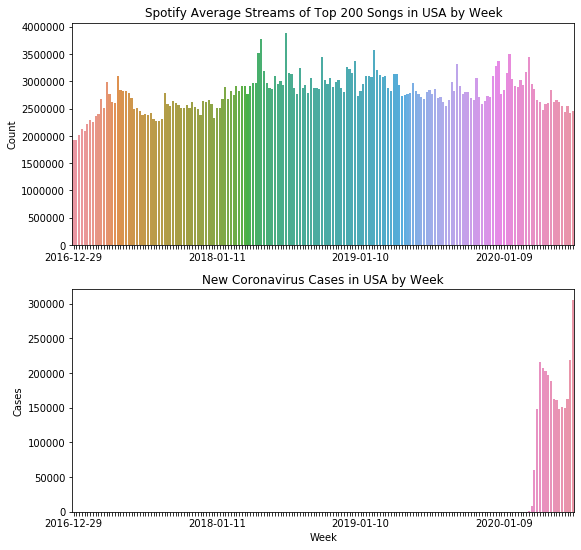

In [125]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(9, 9)

p1 = sns.barplot(x = 'Week', y='Count', ci=None, data=usa_output, ax=ax[0])
[l.set_visible(False) for (i,l) in enumerate(ax[0].xaxis.get_ticklabels()) if i % 52 != 0]
p1.set(title='Spotify Average Streams of Top 200 Songs in USA by Week')
p1.set(xlabel='')

p2 = sns.barplot(x = 'Week', y='Cases', ci=None, data=output2, ax=ax[1])
[l.set_visible(False) for (i,l) in enumerate(ax[1].xaxis.get_ticklabels()) if i % 52 != 0]
p2.set(title='New Coronavirus Cases in USA by Week')
p2.set(xlabel='Week')


plt.show()

In [176]:
stats_df = pd.concat([output[output['Country']=='us'],output2], axis=1).iloc[:,[1,2,5]]
stats_df = stats_df.sort_values(by='Week')
stats_df['Week_ordinal'] = stats_df['Week'].map(dt.datetime.toordinal)
stats_df['Week_ordinal'] = stats_df['Week_ordinal'] - stats_df['Week_ordinal'].min()
stats_df['Count'] = (stats_df['Count'] - stats_df['Count'].mean()) / stats_df['Count'].std()
stats_df['Cases'] = (stats_df['Cases'] - stats_df['Cases'].mean()) / stats_df['Cases'].std()
stats_df.head()

,Week,Count,Cases,Week_ordinal
181,2016-12-29,-2.734576,-0.287403,0
180,2017-01-05,-2.699325,-0.287403,7
179,2017-01-12,-2.425262,-0.287403,14
178,2017-01-19,-2.093736,-0.287403,21
177,2017-01-26,-2.187749,-0.287403,28


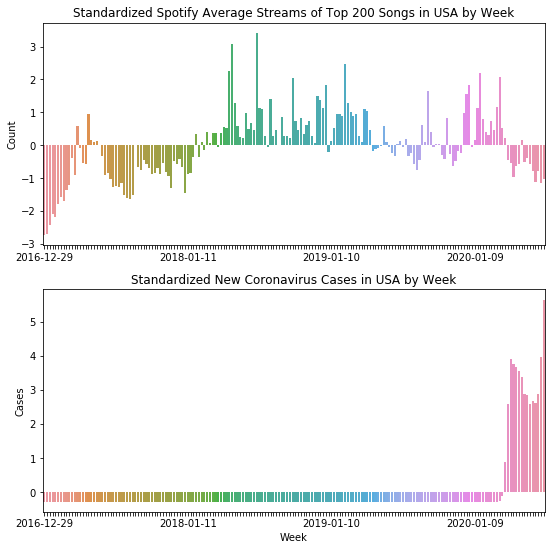

In [233]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(9, 9)

p1 = sns.barplot(x = 'Week', y='Count', ci=None, data=stats_df, ax=ax[0])
[l.set_visible(False) for (i,l) in enumerate(ax[0].xaxis.get_ticklabels()) if i % 52 != 0]
p1.set(title='Standardized Spotify Average Streams of Top 200 Songs in USA by Week')
p1.set(xlabel='')

p2 = sns.barplot(x = 'Week', y='Cases', ci=None, data=stats_df, ax=ax[1])
[l.set_visible(False) for (i,l) in enumerate(ax[1].xaxis.get_ticklabels()) if i % 52 != 0]
p2.set(title='Standardized New Coronavirus Cases in USA by Week')
p2.set(xlabel='Week')


plt.show()

In [234]:
params = {}
coronavirus_start_us = stats_df[stats_df['Cases']>0]['Week_ordinal'].min()
X0 = stats_df[stats_df['Week_ordinal'] < coronavirus_start_us][['Week_ordinal']]
y0 = stats_df[stats_df['Week_ordinal'] < coronavirus_start_us]['Count']
X0 = sm.add_constant(X0)
est0 = sm.OLS(y0, X0).fit()
params['pre-corona'] = est0.params
est0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     64.66
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           1.64e-13
Time:                        22:28:38   Log-Likelihood:                -212.06
No. Observations:                 167   AIC:                             428.1
Df Residuals:                     165   BIC:                             434.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8849      0.135     -6.566      0.000      -1.151      -0.619
Week_ordinal     0.0016      0.000      8.041      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.946   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.308
Skew:                           0.792   Prob(JB):                     2.15e-08
Kurtosis:                       4.602   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
X1 = stats_df[['Week_ordinal']]
y1 = stats_df['Count']
X1 = sm.add_constant(X1)
est1 = sm.OLS(y1, X1).fit()
params['without_cases'] = est1.params
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     27.95
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           3.58e-07
Time:                        22:28:38   Log-Likelihood:                -244.61
No. Observations:                 182   AIC:                             493.2
Df Residuals:                     180   BIC:                             499.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6375      0.139     -4.586      0.000      -0.912      -0.363
Week_ordinal     0.0010      0.000      5.286      0.000       0.001       0.001
==============================================================================
Omnibus:                       14.297   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.650
Skew:                           0.544   Prob(JB):                     0.000147
Kurtosis:                       4.069   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
X2 = stats_df[['Week_ordinal','Cases']]
y2 = stats_df['Count']
X2 = sm.add_constant(X2)
est2 = sm.OLS(y2, X2).fit()
params['with_cases'] = est2.params
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     38.48
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           1.26e-14
Time:                        22:28:39   Log-Likelihood:                -225.20
No. Observations:                 182   AIC:                             456.4
Df Residuals:                     179   BIC:                             466.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0035      0.137     -7.310      0.000      -1.274      -0.733
Week_ordinal     0.0016      0.000      8.204      0.000       0.001       0.002
Cases           -0.4589      0.070     -6.523      0.000      -0.598      -0.320
==============================================================================
Omnibus:                       28.106   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.952
Skew:                           0.814   Prob(JB):                     1.05e-10
Kurtosis:                       4.846   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
stats_df['pre-corona'] = params['pre-corona']['const'] + \
                         params['pre-corona']['Week_ordinal'] * stats_df['Week_ordinal']
stats_df['without_cases'] = params['without_cases']['const'] + \
                            params['without_cases']['Week_ordinal'] * stats_df['Week_ordinal']
stats_df['with_cases'] = params['with_cases']['const'] + \
                         params['with_cases']['Week_ordinal'] * stats_df['Week_ordinal'] + \
                         params['with_cases']['Cases'] * stats_df['Cases']
stats_df.head()

,Week,Count,Cases,Week_ordinal,pre-corona,without_cases,with_cases
181,2016-12-29,-2.734576,-0.287403,0,-0.884948,-0.637471,-0.871655
180,2017-01-05,-2.699325,-0.287403,7,-0.873853,-0.630561,-0.860778
179,2017-01-12,-2.425262,-0.287403,14,-0.862757,-0.623651,-0.849900
178,2017-01-19,-2.093736,-0.287403,21,-0.851662,-0.616742,-0.839023
177,2017-01-26,-2.187749,-0.287403,28,-0.840567,-0.609832,-0.828145


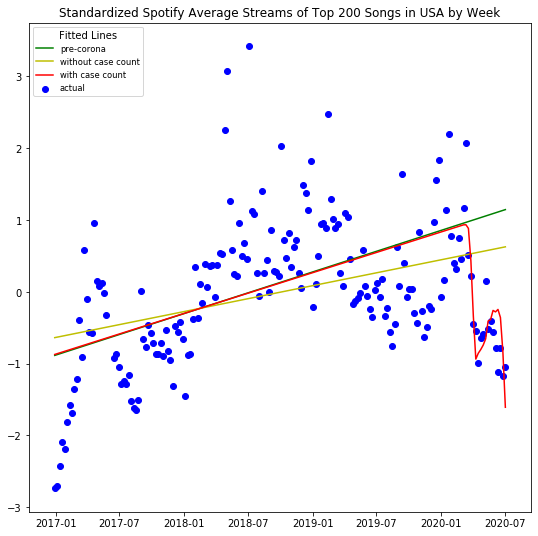

In [232]:
fig, ax = plt.subplots(figsize=(9,9))

plt.plot(stats_df['Week'], stats_df['pre-corona'], color='g')
plt.plot(stats_df['Week'], stats_df['without_cases'], color='y')
plt.plot(stats_df['Week'], stats_df['with_cases'], color='r')
plt.scatter(stats_df['Week'], stats_df['Count'], color='b')

plt.legend(['pre-corona','without case count', 'with case count', 'actual'], title="Fitted Lines",
                    loc=2, fontsize='small', fancybox=True)
plt.title('Standardized Spotify Average Streams of Top 200 Songs in USA by Week')
plt.show()